In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
data=pd.read_csv("netflix1.csv")

In [4]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
data.shape

(8790, 10)

In [6]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
data=data.drop_duplicates()

In [9]:
data['date_added']=pd.to_datetime(data['date_added'])

In [10]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

# 1. Content Type Distribution (Movies vs. TV Shows)

In [11]:
data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [12]:
type_counts=data['type'].value_counts()

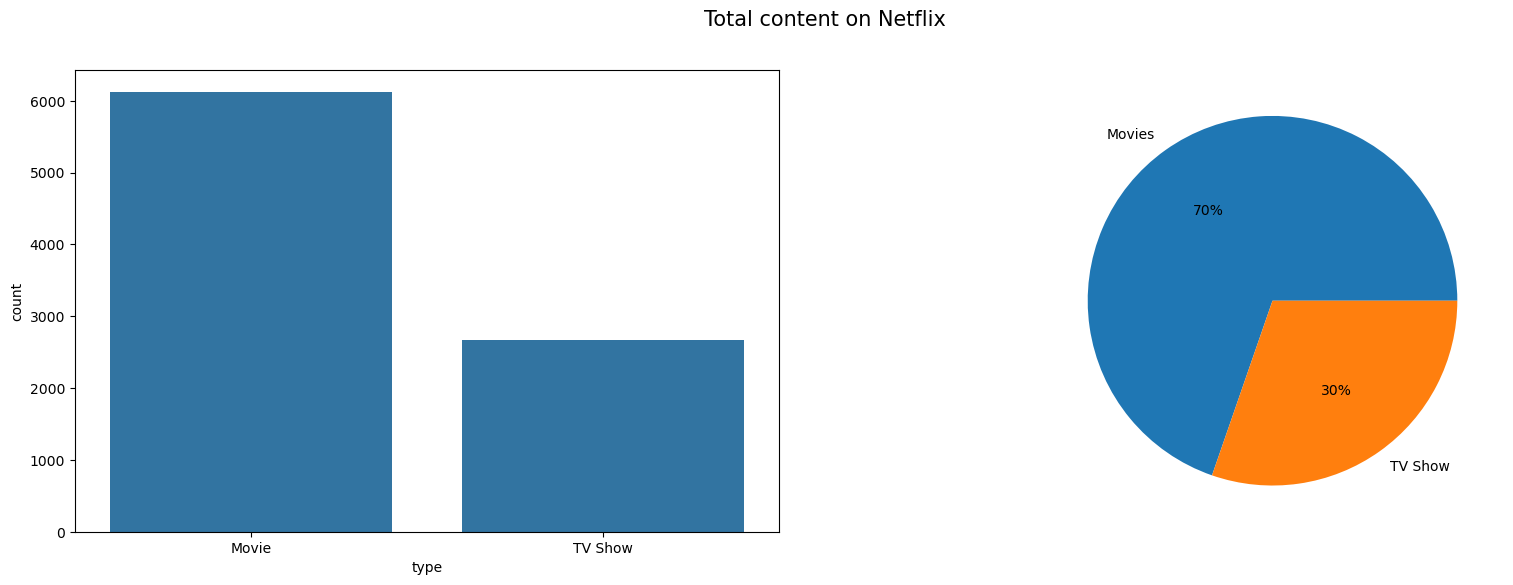

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

sns.countplot(data,x=data['type'])
plt.subplot(1,2,2)
plt.pie(type_counts,labels=['Movies','TV Show'],autopct='%.0f%%')
plt.suptitle("Total content on Netflix",fontsize=15)
plt.show()

# 2. Most Common Genres

In [15]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)


In [16]:
genre_counts

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
dtype: int64

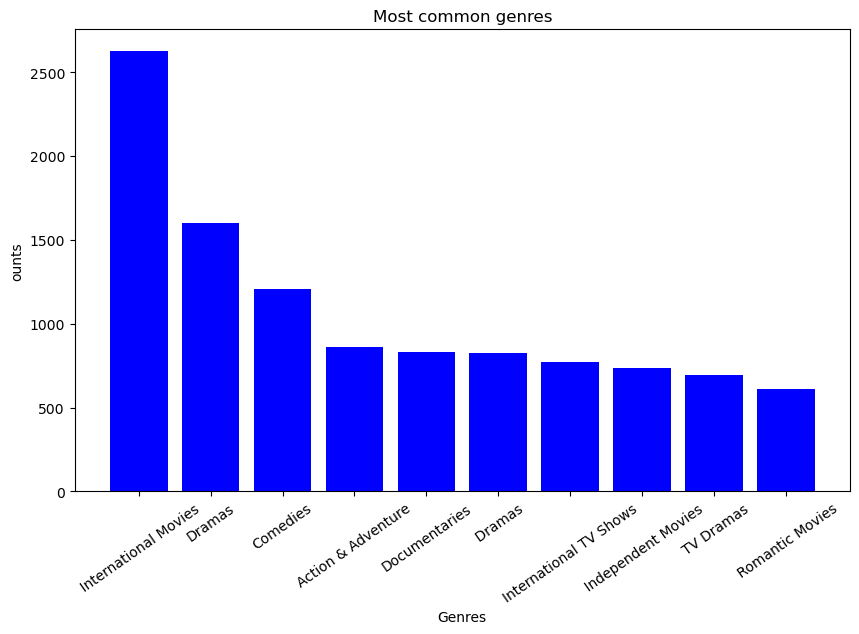

In [24]:
plt.figure(figsize=(10,6))
plt.bar(genre_counts.index,genre_counts.values,color="blue")
plt.xticks(rotation=35)
plt.xlabel("Genres")
plt.ylabel("ounts")
plt.title("Most common genres")
plt.show()

#  3. Content Added Over Time

In [25]:
data['month']=data['date_added'].dt.month
data['year']=data['date_added'].dt.year

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_9692\3706308737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year',data=data,palette="coolwarm")


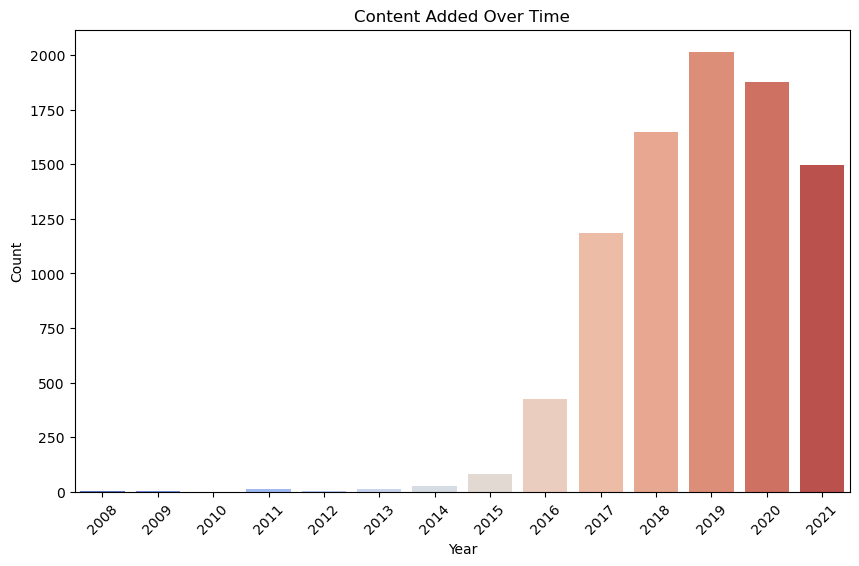

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='year',data=data,palette="coolwarm")
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#  4. Top 10 Directors with the Most Titles


In [35]:
top_directors=data['director'].value_counts().head(10)

In [36]:
top_directors

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_9692\2698864327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values,y=top_directors.index,palette='Blues_d')


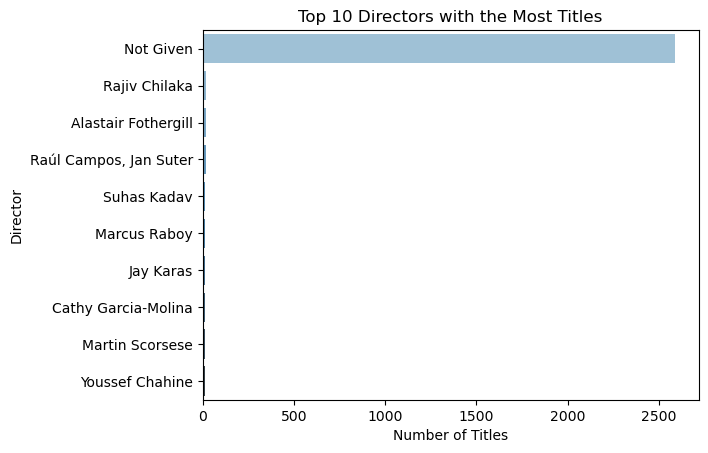

In [38]:
sns.barplot(x=top_directors.values,y=top_directors.index,palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

#  5.Word Cloud of Movie Titles

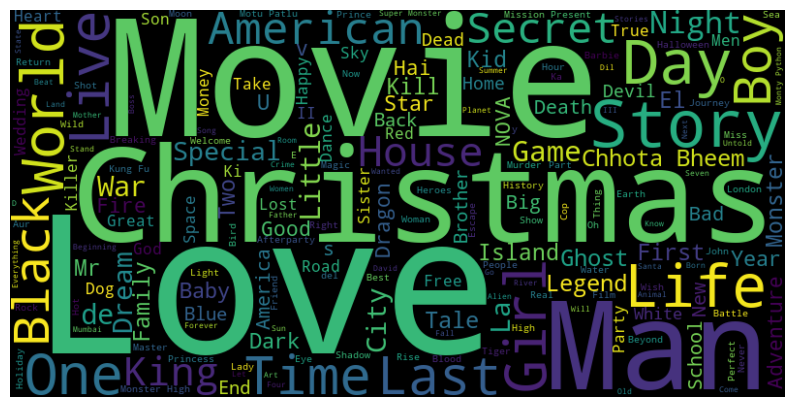

In [41]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud=WordCloud(width=800,height=400,
background_color='black').generate(' '.join(movie_titles))
 
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# EXTRA PART

In [43]:
ratings=data['rating'].value_counts()

In [44]:
ratings

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

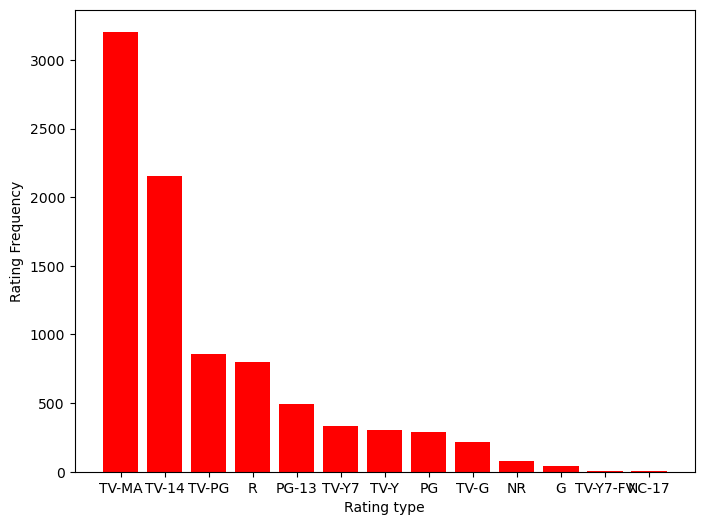

In [45]:
rating_type=['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13','TV-Y7', 'TV-Y', 'PG', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'NC-17']
rating_frequency = [3205, 2157, 861, 799, 490, 333, 306, 287, 220, 79, 41, 6, 3]
plt.figure(figsize=(8,6))
plt.bar(rating_type,rating_frequency,color="red")
plt.xlabel("Rating type")
plt.ylabel("Rating Frequency")
plt.show()

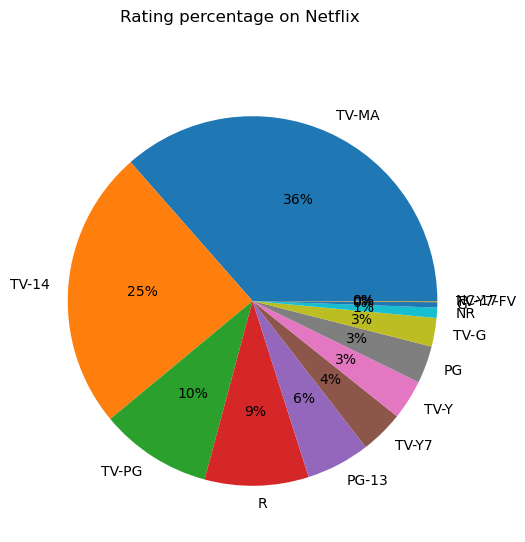

In [46]:
plt.figure(figsize=(10,6))
plt.pie(rating_frequency,labels=rating_type,autopct='%.0f%%')
plt.suptitle("Rating percentage on Netflix")
plt.show()

In [47]:
country_counts=data['country'].value_counts()[:10]

In [48]:
country_counts

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

In [49]:
countries=country_counts.index
frequency=country_counts.values

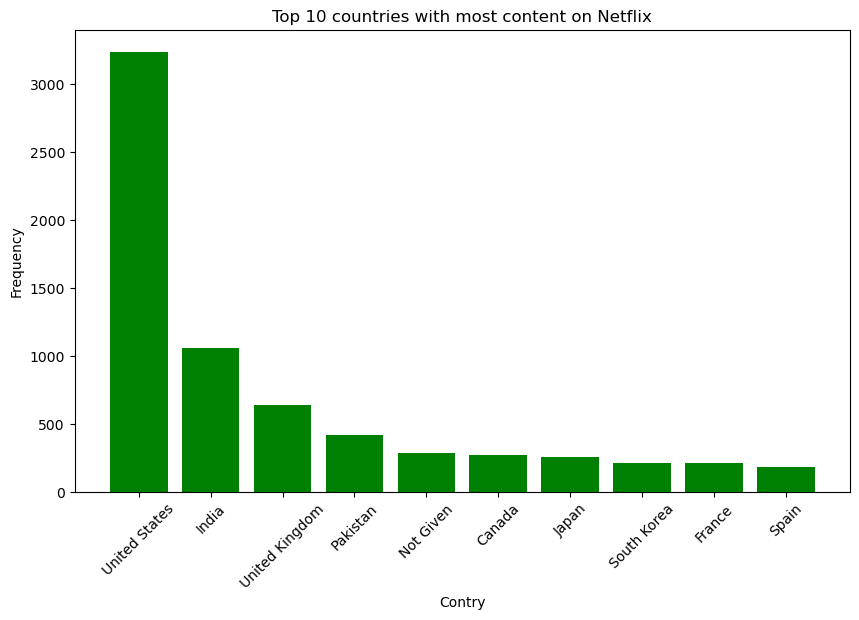

In [50]:
plt.figure(figsize=(10,6))
plt.bar(countries,frequency,color="green")
plt.xlabel("Contry")
plt.ylabel("Frequency")
plt.title("Top 10 countries with most content on Netflix")
plt.xticks(rotation=45)
plt.show()

In [51]:
data['month']=data['date_added'].dt.month
data['year']=data['date_added'].dt.year

In [52]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()

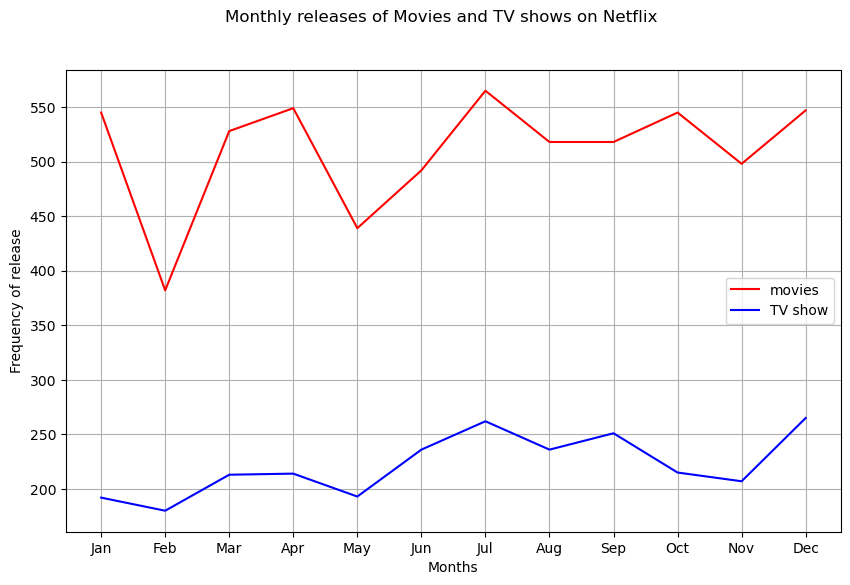

In [53]:
plt.figure(figsize=(10,6))
plt.plot(monthly_movie_release.index,monthly_movie_release.values,color='red',label="movies")
plt.plot(monthly_series_release.index,monthly_series_release.values,color='blue',label="TV show")
plt.xlabel("Months")
plt.ylabel("Frequency of release")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
yearly_movie_release=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_release=data[data['type']=='TV Show']['year'].value_counts().sort_index()


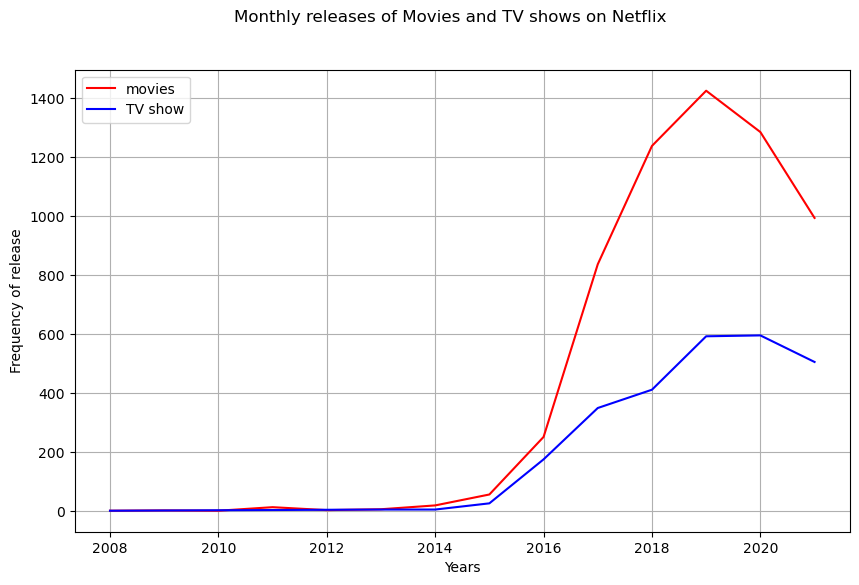

In [55]:
plt.figure(figsize=(10,6))
plt.plot(yearly_movie_release.index,yearly_movie_release.values,color='red',label="movies")
plt.plot(yearly_series_release.index,yearly_series_release.values,color='blue',label="TV show")
plt.xlabel("Years")
plt.ylabel("Frequency of release")
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.legend()
plt.grid(True)
plt.show()